In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [65]:
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

## 1.
Answer: Rolling sevens is more probable than rolling snake eyes.

Since there is only one combination to roll snake eyes (1+1) but 6 combinations (1+6, 2+5, 3+4, 4+3， 5+2， 6+1）to roll a seven, the probabilities ratios are 1:6.

## 2.

$P_{(A+B)}(x) = \sum_z P_A(z)P_B(x-z)$ , where $P_A(x) = P_B(x) = \frac{1}{6}$ when $ 1 \leq x\leq6$, otherwise $P_A(x) = P_B(x) = 0$

$P_{(A+B)}(x) = \int P_A(z)P_B(x-z)dz$ = $P_A(x)*P_B(x)$

### Analytically:
    
    

For a sum of 2, there is only 1 term in the sum, with $P_A = P_B = \frac{1}{6}$, the probability is thus $\frac{1}{36}$.

For a sum of 3, there are 2 terms in the sum, so the probability is $\frac{2}{36} = \frac{1}{18} $.

For a sum of 4, there are 3 terms in the sum, so the probability is $\frac{3}{36} = \frac{1}{12} $.

For a sum of 5, there are 4 terms in the sum, so the probability is $\frac{4}{36} = \frac{1}{9} $.

For a sum of 6, there are 5 terms in the sum, so the probability is $\frac{5}{36}$.

For a sum of 7, there are 6 terms in the sum, so the probability is $\frac{6}{36} = \frac{1}{6} $.

For a sum of 8, there are 5 terms in the sum, so the probability is $\frac{5}{36}$.

For a sum of 9, there are 4 terms in the sum, so the probability is $\frac{4}{36} = \frac{1}{9} $.

For a sum of 10, there are 3 terms in the sum, so the probability is $\frac{3}{36} = \frac{1}{12} $.

For a sum of 11, there are 2 terms in the sum, so the probability is $\frac{2}{36} = \frac{1}{18} $.

For a sum of 12, there is 1 term in the sum, so the probability is $\frac{1}{36}$.


### Numerically:

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]
[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


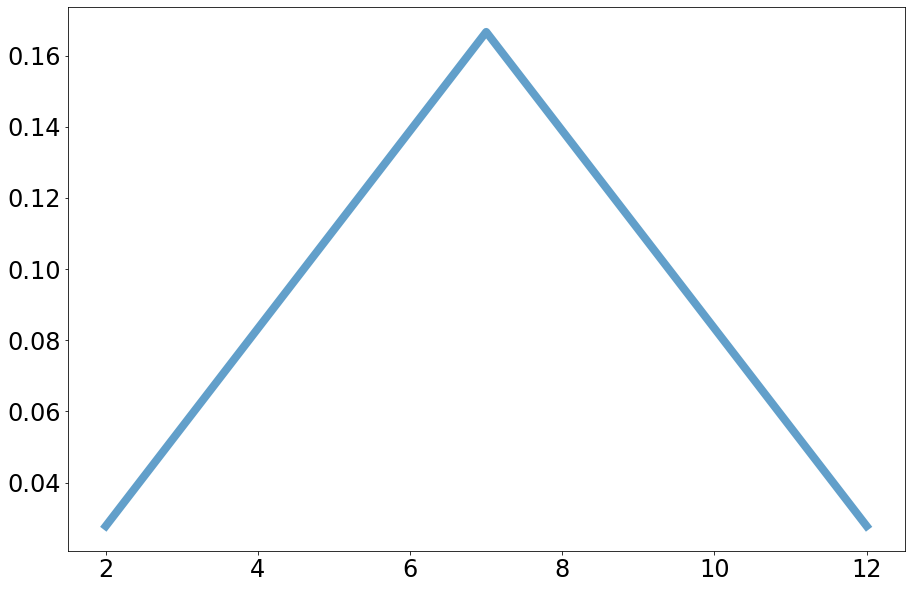

In [72]:
# x must be an interger
def dice(x):
    if 1 <= x <= 6:
        # one in 6 possiblility to get an interger in [1,6]
        return 1/6   
    else:
        # zero possibility in getting any other value
        return 0

# Using iterating summation 
hist = np.zeros(16)
for i in np.arange(0,16):
    sum = 0
    for z in np.arange(0,16):
        conv = dice(z)*dice(i - z)
        sum += conv
    hist[i] = sum
# pick out only the non-zero terms
hist_non0 = hist[2:13]
print(hist_non0)

# Using convolution
dice_hist = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
print(dice_hist)
dice_2 = np.convolve(dice_hist,dice_hist)
print(dice_2)
plt.tick_params(labelsize = 24)
plt.plot(np.arange(2,13), dice_2, linewidth = 8,alpha = 0.7)

## 3

In [47]:
#mean
dice_mean = np.mean(dice_2)
dice_mean

0.09090909090909091

In [48]:
#variance
dice_var = np.var(dice_2)
dice_var

0.0019768390980512197

In [ ]:
## 

[1.65381717e-08 1.65381717e-07 9.09599443e-07 3.63839777e-06
 1.18247928e-05 3.31094197e-05 8.26081676e-05 1.87542867e-04
 3.92946959e-04 7.67701930e-04 1.40951530e-03 2.44665712e-03
 4.03407353e-03 6.34189270e-03 9.53533096e-03 1.37465945e-02
 1.90415547e-02 2.53867551e-02 3.26236936e-02 4.04573294e-02
 4.84643679e-02 5.61241048e-02 6.28704385e-02 6.81581055e-02
 7.15327194e-02 7.26928060e-02 7.15327194e-02 6.81581055e-02
 6.28704385e-02 5.61241048e-02 4.84643679e-02 4.04573294e-02
 3.26236936e-02 2.53867551e-02 1.90415547e-02 1.37465945e-02
 9.53533096e-03 6.34189270e-03 4.03407353e-03 2.44665712e-03
 1.40951530e-03 7.67701930e-04 3.92946959e-04 1.87542867e-04
 8.26081676e-05 3.31094197e-05 1.18247928e-05 3.63839777e-06
 9.09599443e-07 1.65381717e-07 1.65381717e-08]


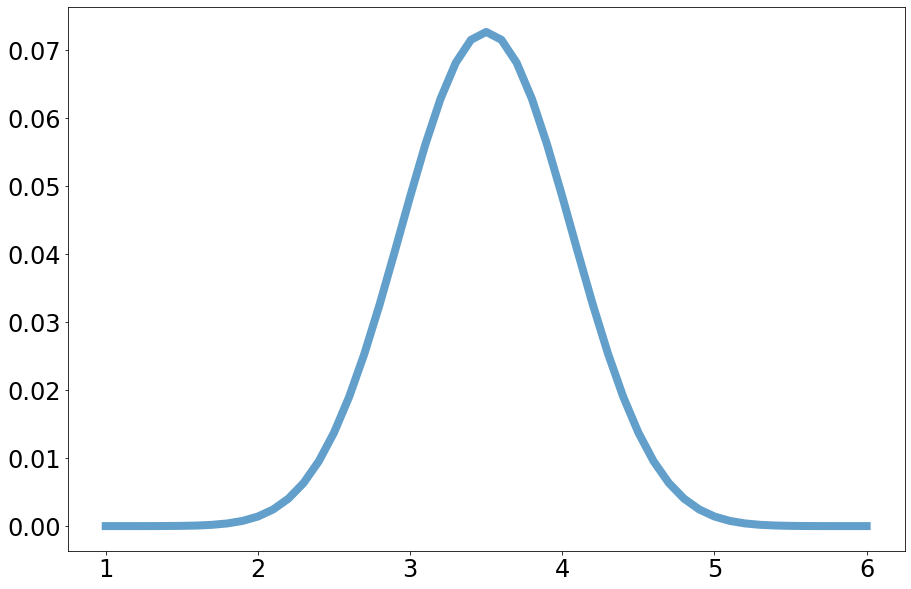

In [96]:
conv_10 = dice_hist
# For 10 dice we convolve convolve 9 times
for i in np.arange(0,9):
    conv_10 = np.convolve(conv_10, dice_hist)
print(conv_10)

#10 dice, the sums range from [10,60] so the averages range from (1.0, 6.0)
plt.tick_params(labelsize = 24)
plt.plot(np.arange(1,6.1,0.1), conv_10, linewidth = 8,alpha = 0.7)

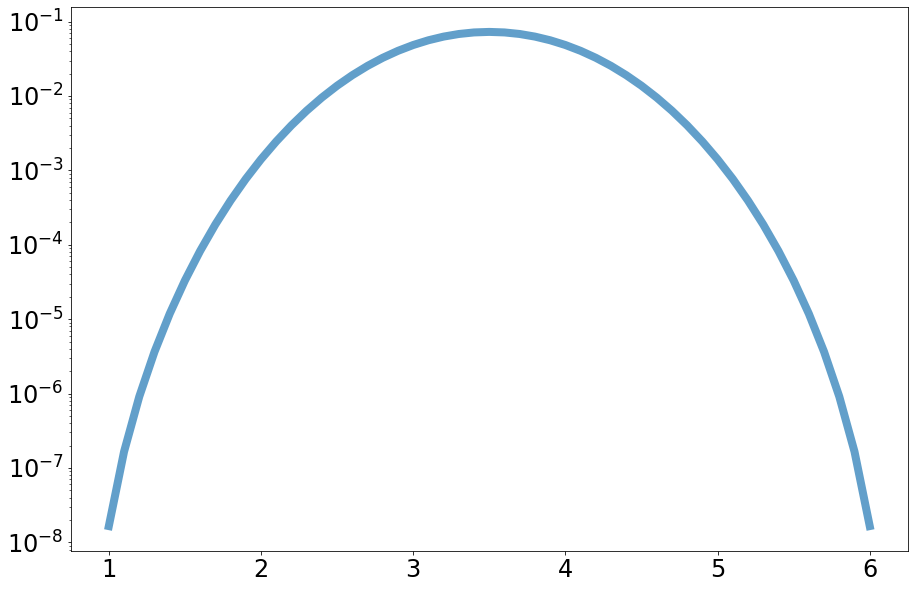

In [97]:
# Let's plot the same data in a semi-log
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.plot(np.arange(1,6.1,0.1), conv_10, linewidth = 8,alpha = 0.7)

Under pure visual observation, the semi-log plot of the 10-dice appears to be parabolic so we can safely say that it is a Gaussian distribution.

Since the sum curve is a Gaussian and each average value is just the sum divided by the total number of dices, we should only see a change in the scale of the x axis and not the change of the shape of the curve, which makes it remain a Gaussian.

## 5

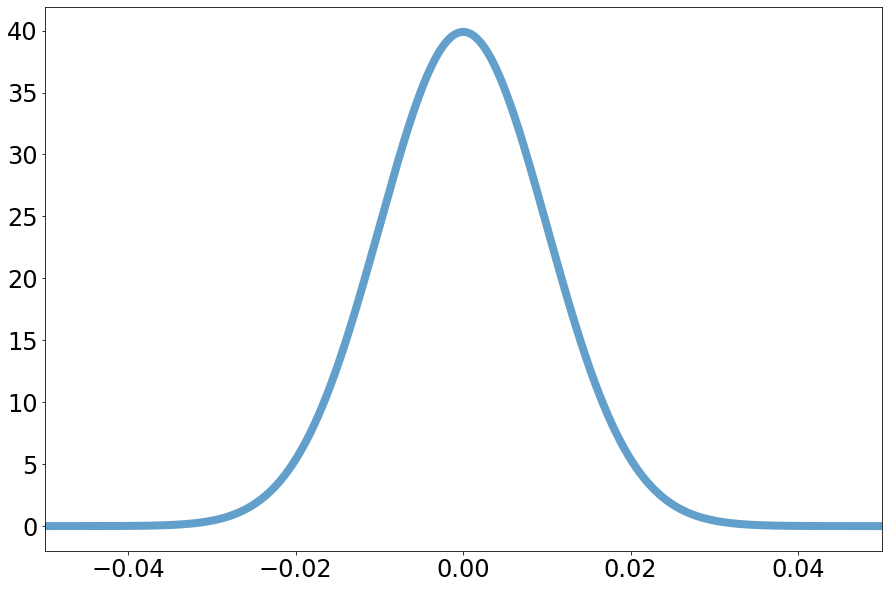

In [129]:
# Similar sample as HW1

gaussian = stats.norm.pdf(x,loc = 0., scale = 0.01)

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
plt.xlim([-0.05, 0.05])
x = np.linspace(-0.05, 0.05 ,1000)
ax.plot(x,gaussian ,linewidth = 8,alpha = 0.7)
plt.show()

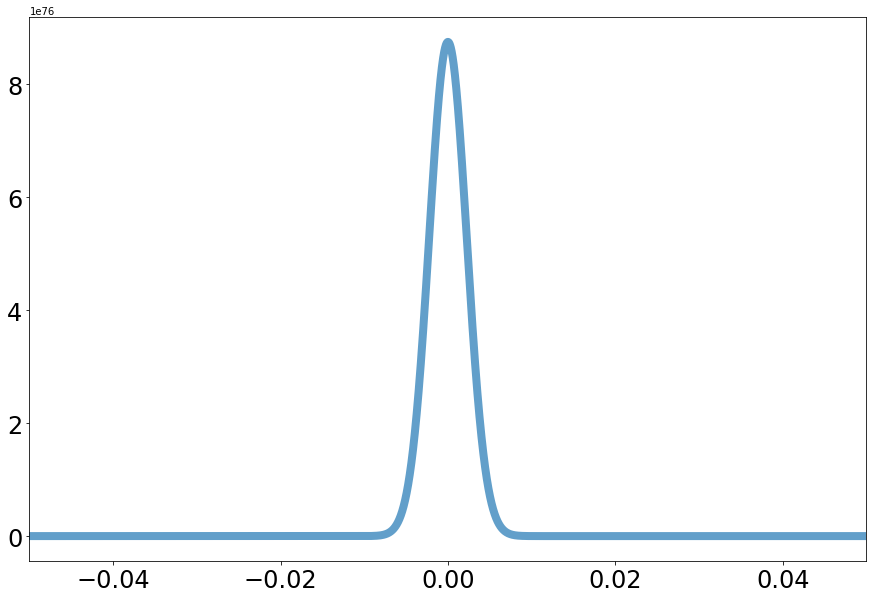

In [132]:
# Convolve the Gaussian 20 times:
conv_20 = gaussian
for i in np.arange(0,19):
    conv_20 = np.convolve(conv_20, gaussian)
plt.tick_params(labelsize = 24)
plt.xlim([-0.05, 0.05])
x = np.linspace(-0.05, 0.05, 19981)
plt.plot(x, conv_20 ,linewidth = 8,alpha = 0.7)

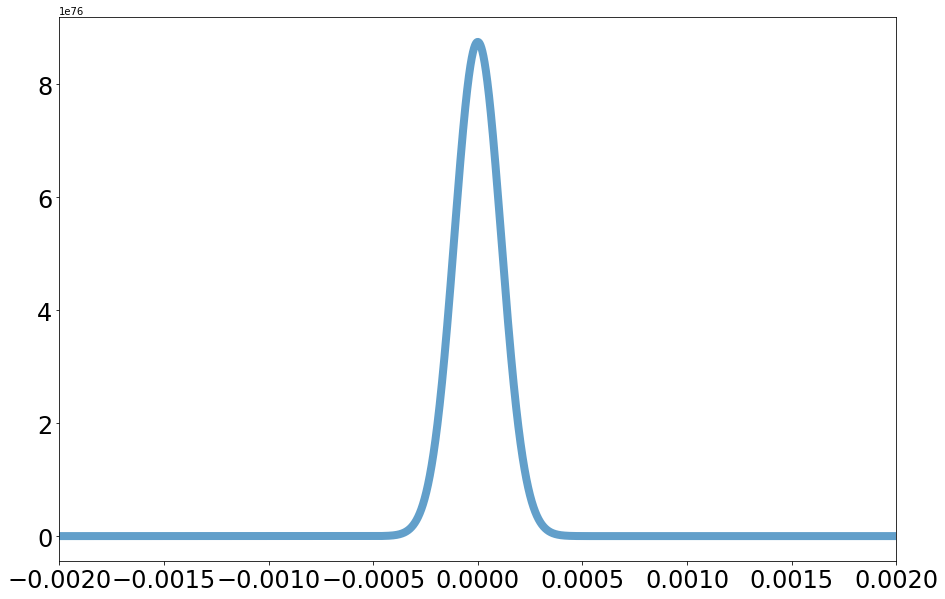

In [142]:
# Take an average of 20 of the convolution
x = np.linspace(-0.05, 0.05, 19981)
plt.tick_params(labelsize = 24)
plt.xlim([-0.002, 0.002])
x_avg = x / 20
plt.plot(x_avg, conv_20 ,linewidth = 8,alpha = 0.7)


The sums and averages of Gaussian distributions are Gaussian graphs of different widths.

The values for each standard deviation (1-sigma, 2-sigma, etc, are) closer to the mean for the sums and even closer to the mean for the average.

Integrating a signal over time means to sum up a gaussian over time, which is equal to convolving the gaussian with itself.
